<a href="https://colab.research.google.com/github/shoulhafiz/python_data_science/blob/master/Dask_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import time
from dask import delayed

In [2]:
%%time

def plus(x):
    # i do sometihng heavy calculation
    time.sleep(2)
    return x + 10

a = plus(20)
b = plus(40)
c = a + b
d = plus(c)

CPU times: user 1.94 ms, sys: 198 µs, total: 2.13 ms
Wall time: 6.01 s


In [3]:
%%time

a = delayed(plus)(20)
b = delayed(plus)(40)
c = a + b
d =delayed(plus)(c)
print(d)

Delayed('plus-d63c7733-c9eb-4e2e-9f1a-969c81f2b0bf')
CPU times: user 2.67 ms, sys: 0 ns, total: 2.67 ms
Wall time: 3.29 ms


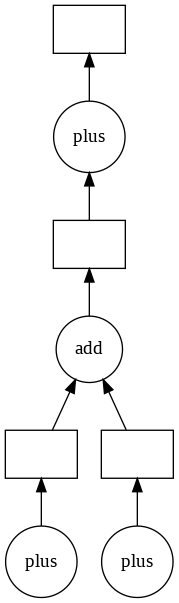

In [4]:
d.visualize()

In [5]:
%%time

print(d.compute())

90
CPU times: user 11 ms, sys: 4.46 ms, total: 15.5 ms
Wall time: 4.03 s


In [6]:
%%time

sums = []

for i in range(10):
  s = plus(i)
  sums.append(s)

print(sum(sums))

sums = []

145
CPU times: user 21.7 ms, sys: 6.27 ms, total: 28 ms
Wall time: 20 s


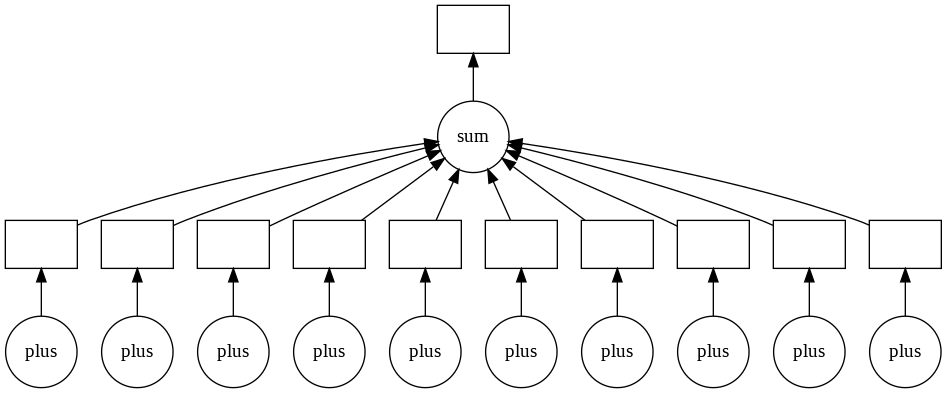

In [7]:
for i in range(10):
  s = delayed(plus)(i)
  sums.append(s)

d = delayed(sum)(sums)
d

d.visualize()

In [8]:
%%time

d.compute()


CPU times: user 15.5 ms, sys: 7.07 ms, total: 22.6 ms
Wall time: 10 s


145

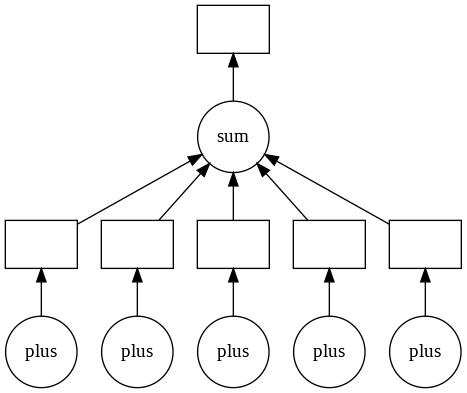

In [9]:
# now, i want to sum only even number

sums = []

for i in range(10):
  if i % 2 == 0:
    sums.append(delayed(plus)(i))

d = delayed(sum)(sums)
d.visualize()

In [10]:
d.compute()

70

In [11]:
d.compute()

import os
import numpy as np
import pandas as pd
from glob import glob
import tarfile
import urllib.request
import zipfile

data_dir = 'data'

if not os.path.exists(data_dir):
    os.makedirs(data_dir)
    
flights_raw = os.path.join(data_dir, 'nycflights.tar.gz')
flightdir = os.path.join(data_dir, 'nycflights')
jsondir = os.path.join(data_dir, 'flightjson')

if not os.path.exists(flights_raw):
    print("- Downloading NYC Flights dataset... ", end='', flush=True)
    url = "https://storage.googleapis.com/dask-tutorial-data/nycflights.tar.gz"
    urllib.request.urlretrieve(url, flights_raw)
    print("done")

if not os.path.exists(flightdir):
    print("- Extracting flight data... ", end='', flush=True)
    tar_path = os.path.join(data_dir, 'nycflights.tar.gz')
    with tarfile.open(tar_path, mode='r:gz') as flights:
        flights.extractall('data/')
    print("done")

- Downloading NYC Flights dataset... done
- Extracting flight data... done


In [12]:
files = glob('data/nycflights/*.csv')
files

['data/nycflights/1992.csv',
 'data/nycflights/1990.csv',
 'data/nycflights/1998.csv',
 'data/nycflights/1991.csv',
 'data/nycflights/1994.csv',
 'data/nycflights/1995.csv',
 'data/nycflights/1993.csv',
 'data/nycflights/1996.csv',
 'data/nycflights/1999.csv',
 'data/nycflights/1997.csv']

In [13]:
df = pd.read_csv(files[0])
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
0,1992,1,7,2,640.0,640,851.0,853,US,53,NaN,131.0,133,NaN,-2.0,0.0,EWR,IND,644.0,NaN,NaN,0,0
1,1992,1,8,3,639.0,640,837.0,853,US,53,NaN,118.0,133,NaN,-16.0,-1.0,EWR,IND,644.0,NaN,NaN,0,0
2,1992,1,9,4,644.0,640,905.0,853,US,53,NaN,141.0,133,NaN,12.0,4.0,EWR,IND,644.0,NaN,NaN,0,0
3,1992,1,11,6,640.0,640,834.0,853,US,53,NaN,114.0,133,NaN,-19.0,0.0,EWR,IND,644.0,NaN,NaN,0,0
4,1992,1,12,7,639.0,640,832.0,853,US,53,NaN,113.0,133,NaN,-21.0,-1.0,EWR,IND,644.0,NaN,NaN,0,0


In [14]:
%%time

sums = []
counts = []

for file in files:
  df = pd.read_csv(file)
  grouped = df.groupby('Origin')['DepDelay']
  sums.append(grouped.agg('sum'))
  counts.append(grouped.agg('count'))

sums = sum(sums)
counts = sum(counts)
mean = sums / counts
print(mean)

Origin
EWR    10.295469
JFK    10.351299
LGA     7.431142
Name: DepDelay, dtype: float64
CPU times: user 6.66 s, sys: 149 ms, total: 6.81 s
Wall time: 6.83 s


In [15]:
%%time

sums = []
counts = []

for file in files:
  df = delayed(pd.read_csv(file))
  grouped = df.groupby('Origin')['DepDelay']
  sums.append(grouped.agg('sum'))
  counts.append(grouped.agg('count'))

sums = sum(sums)
counts = delayed(sum(counts))
mean = delayed(sums / counts)
print(mean)

Delayed('truediv-79df3d0a09e0b011115e4121b7bb2a9d')
CPU times: user 5.97 s, sys: 297 ms, total: 6.26 s
Wall time: 6.27 s


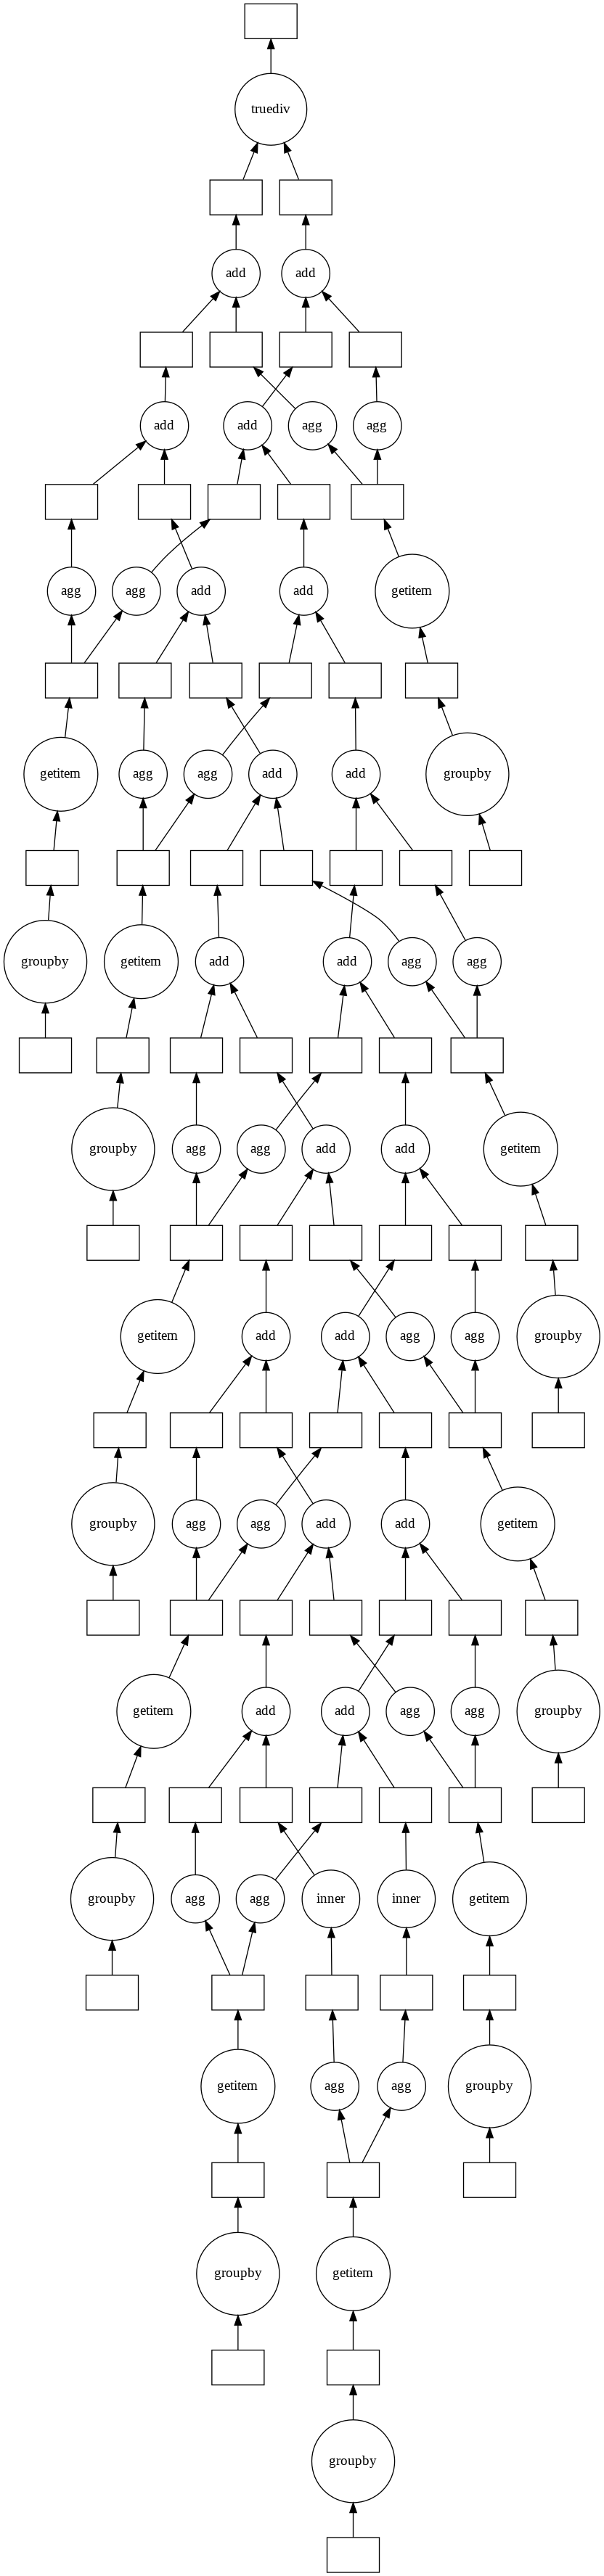

In [16]:
mean.visualize()

In [21]:
%%time
mean.compute()

CPU times: user 335 ms, sys: 13.7 ms, total: 349 ms
Wall time: 228 ms


Origin
EWR    10.295469
JFK    10.351299
LGA     7.431142
Name: DepDelay, dtype: float64